## Marketing effects 

In this notebook, we wanted to visualize the average effects of the marketing campaigns in terms of expenditures when a customer is part of a campaign as to compared to when it is not part of it.

### Importing the relevant libraries and datasets

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
avg_spend_trips = pd.read_csv('../../data_final_project/avg_spend_trips.csv')

In [4]:
avg_spend_trips.head()

,HOUSEHOLD_KEY,cluster,avg_trips_not_in,avg_spend_not_in,avg_trips_in,avg_spend_in,campaigns,sensitivity_mk
0,1,3,0.6484,35.572818,0.9233,45.402034,8,0.276313
1,7,2,0.4348,23.534944,0.7637,46.265632,4,0.965827
2,20,2,2.6011,49.620914,4.9257,98.995329,7,0.995032
3,25,2,0.7158,24.433189,1.0535,34.944387,4,0.430202
4,27,4,1.3438,8.926562,5.0278,75.702639,7,7.480604


### Slicing the relevant viriables for the analysis,

As we are comparing average expenditures of a household when they are part of a marketing campaign and when they are not, we only need their averages expenditures in both cases.

In [9]:
avg_spend = avg_spend_trips.loc[:,['HOUSEHOLD_KEY','avg_spend_not_in','avg_spend_in']]

In [10]:
avg_spend.index = np.arange(1, len(avg_spend) + 1)

In [11]:
avg_spend.reset_index(drop=False, inplace=True)

In [12]:
avg_spend.rename(columns = {'index': 'Day'}, inplace=True)

In [13]:
avg_spend.head()

,Day,HOUSEHOLD_KEY,avg_spend_not_in,avg_spend_in
0,1,1,35.572818,45.402034
1,2,7,23.534944,46.265632
2,3,20,49.620914,98.995329
3,4,25,24.433189,34.944387
4,5,27,8.926562,75.702639


### In terms of presenting the insights, we wanted to visually represent a sample of the data

In [21]:
avg_spend_in_campaigns = avg_spend[avg_spend['Day'] > 200]

In [22]:
avg_spend_in_campaigns.head()

,Day,HOUSEHOLD_KEY,avg_spend_not_in,avg_spend_in
200,201,1226,46.110357,78.083370
201,202,1234,34.966085,64.877778
202,203,1236,47.644143,26.314191
203,204,1247,44.746633,75.753365
204,205,1263,41.550000,54.553333


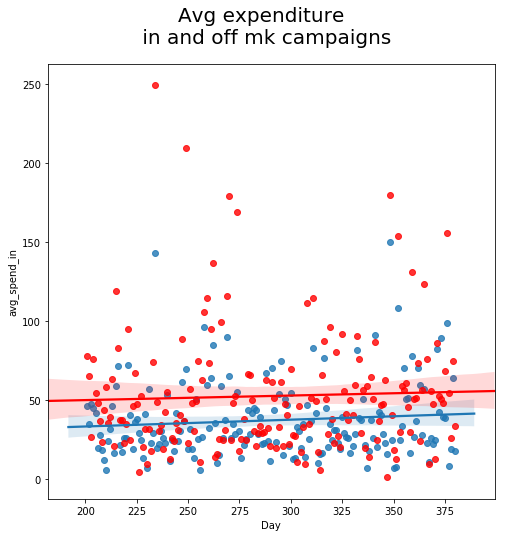

In [23]:
plt.figure(figsize=(8,8))

plt.suptitle('Avg expenditure \n in and off mk campaigns', fontsize=20)
sns.regplot('Day', 'avg_spend_not_in', data=avg_spend_in_campaigns)
sns.regplot('Day', 'avg_spend_in', data=avg_spend_in_campaigns, color='r')
# "r" as for color red which represents the expenditure from customers that were buying products subject object of
# a mk campaign at that particular time.

#### Comments:



The graph above shows that on average the expenditure of customers whenever they where buying products object of a mk campaign, was higher. Note that a particular customer can carry out a purchase that belong either to the group represented by color red or to the one represented by the color blue, and that is because the non-customized mk campaigns were rotating the products that were part of them. Besides the customers that were eligible for the campaigns were also rotating and changing the specific mk campaigns they were offered.

#### Repeating it for a larger time window

In [60]:
avg_in_mk = pd.read_csv("../../data_final_project/avg_after_mk.csv")

In [61]:
avg_off_mk = pd.read_csv("../../data_final_project/avg_before_mk.csv")

In [62]:
avg_off_mk = avg_off_mk.reset_index(drop=False).rename(columns={'index': 'Day'})

In [63]:
avg_in_mk = avg_in_mk.reset_index(drop=False).rename(columns={'index': 'Day'})

In [64]:
avg_in_mk.head()

,Day,household_key,avg_trips,avg_spend,campaigns
0,0,1,0.9233,45.402034,8
1,1,2,0.2985,16.554726,1
2,2,3,0.3104,10.918182,3
3,3,4,0.1552,4.654767,1
4,4,6,2.7601,58.187473,4


In [65]:
avg_off_mk = avg_off_mk[np.logical_and(avg_off_mk['Day']<500, avg_off_mk['Day']>200)]

In [66]:
avg_off_mk.head()

,Day,household_key,avg_trips,avg_spend
201,201,317,0.6074,53.660738
202,202,318,0.8243,11.501302
203,203,319,1.2500,36.490313
204,204,321,0.9981,57.627684
205,205,322,0.6961,26.811715


In [67]:
avg_in_mk = avg_in_mk[np.logical_and(avg_in_mk['Day']<500, avg_in_mk['Day']>200)]

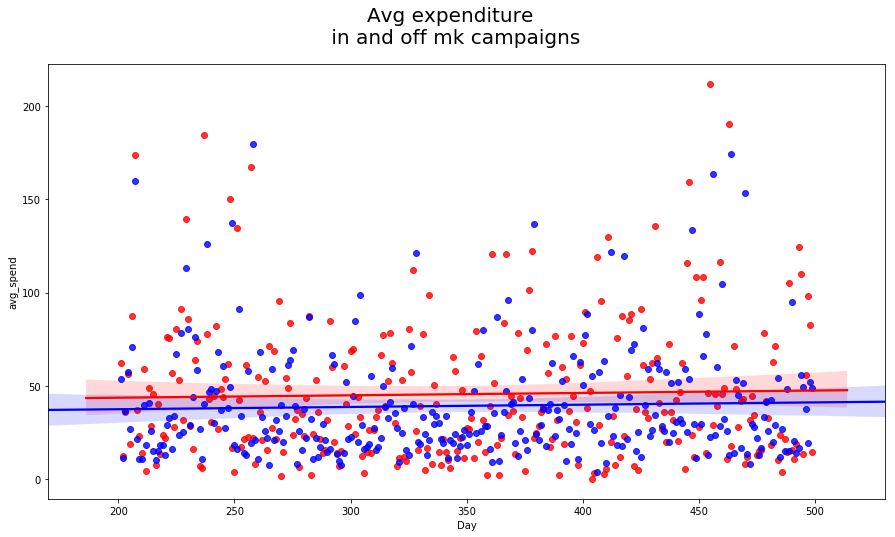

In [68]:
plt.figure(figsize=(15,8))

plt.suptitle('Avg expenditure \n in and off mk campaigns', fontsize=20)
sns.regplot('Day', 'avg_spend', data=avg_in_mk, color='r')
sns.regplot('Day', 'avg_spend', data=avg_off_mk, color='b')